In [46]:
import pandas as pd 
import numpy as np 

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import glob

In [53]:
bald = glob.glob('own-images/projected/Bald/**/*.npz')
notbald = glob.glob('own-images/projected/NotBald/**/*.npz')

In [63]:
X = pd.DataFrame()

In [64]:
y = []

for b in bald:
    x = pd.DataFrame(np.load(b)['w'][0, 0, :].reshape(1,-1))
    X = pd.concat([X, x]) 
    y.append(1)

for b in notbald:
    x = pd.DataFrame(np.load(b)['w'][0, 0, :].reshape(1,-1))
    X = pd.concat([X, x]) 
    y.append(0)




In [65]:
y = np.array(y)#.reshape(-1,1)

In [66]:
X = X.reset_index(drop=True)

In [67]:
# Create an SVM classifier
classifier = svm.SVC(kernel='linear')

# Train the classifier
classifier.fit(X, y)

SVC(kernel='linear')

In [75]:
np.save('baldness.npy', classifier.coef_)

In [163]:
classifier.support_vectors_[0]

array([ 6.95245266e-01,  8.39788169e-02, -7.82900602e-02,  3.15904826e-01,
        6.12417936e-01,  1.45811176e+00, -1.10301900e+00,  1.79791200e+00,
       -1.08309484e+00,  1.03840935e+00, -1.30504978e+00, -1.21772075e+00,
        4.13250536e-01, -4.92633963e+00,  1.53275621e+00, -2.38234591e+00,
       -8.74276817e-01, -5.72131872e-01,  1.71171546e+00, -3.41171837e+00,
        3.18872303e-01,  1.76516986e+00, -1.45553565e+00, -4.90114033e-01,
        2.19362760e+00,  1.59701514e+00,  2.23316026e+00,  3.79646182e-01,
       -1.46475923e+00,  2.03636289e-01, -1.66603363e+00, -9.50906992e-01,
       -1.99275219e+00,  1.15352046e+00, -1.75392985e+00,  7.01589823e-01,
        1.84935117e+00,  5.60167372e-01,  2.72101951e+00, -1.53208387e+00,
       -1.17517316e+00, -1.87891030e+00,  1.66370440e+00,  3.89190650e+00,
       -2.07847238e+00, -2.52068609e-01,  4.22507143e+00,  8.81871939e-01,
        3.34555507e+00,  2.11705184e+00,  3.77581656e-01, -3.08738399e+00,
        2.65923905e+00, -

# New images

In [418]:
boundary = np.load('baldness.npy')

In [419]:
# %%capture
# ! python stylegan2_ada_pytorch/projector.py --outdir=latent_codes/test --target=images/align-brad-pitt.jpeg \
#     --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl --save-video=False

In [420]:
projection = np.load('latent_codes/je/projected_w.npz')['w']

In [421]:
m = 15
projection_with_shift = projection[0] +   m * np.tile(perp, 18).reshape(1,18,512)

In [422]:
projection_with_shift

array([[ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583],
       [ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583],
       [ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583],
       ...,
       [ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583],
       [ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583],
       [ 2.69649143,  0.1603971 , -0.18595665, ..., -1.36763506,
         0.63799059,  0.46082583]])

In [423]:
np.savez('latent_codes/jen/projected_with_shift.npz', w=projection_with_shift)

In [424]:
%%capture

! python stylegan2_ada_pytorch/generate.py --outdir=latent_shift --projected-w=latent_codes/jen/projected_with_shift.npz \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

# Rock

In [317]:
boundary = np.load('baldness.npy')

In [318]:
# %%capture
# ! python stylegan2_ada_pytorch/projector.py --outdir=latent_codes/test --target=images/align-brad-pitt.jpeg \
#     --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl --save-video=False

In [319]:
projection = np.load('latent_codes/rock/projected_w.npz')['w']

In [320]:
perp = classifier.coef_[0]

In [325]:
m = -0
projection_with_shift = projection[0] +   m * np.tile(perp, 18).reshape(1,18,512)

In [326]:
projection_with_shift

array([[[-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053],
        [-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053],
        [-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053],
        ...,
        [-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053],
        [-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053],
        [-1.41086948,  2.65593481, -0.38764468, ..., -1.80215502,
         -0.98422301, -2.04516053]]])

In [327]:
np.savez('latent_codes/rock/projected_with_shift.npz', w=projection_with_shift)

In [328]:
%%capture

! python stylegan2_ada_pytorch/generate.py --outdir=latent_shift --projected-w=latent_codes/rock/projected_with_shift.npz \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

# Plot

In [333]:
import matplotlib.pyplot as plt
import PIL

In [387]:
def visualize_img_and_label(jen, rock):
    
    plt.figure(figsize=(12, 5))
    for i in range(5):
        im = PIL.Image.open('latent_shift/' + jen[i])
        plt.subplot(2, 5, i+1)
        plt.imshow(im)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(2, 5, 6+i)
        im = PIL.Image.open('latent_shift/' + rock[i])
        plt.imshow(im) # lab.permute(1,2,0)
        plt.xticks([])
        plt.yticks([])
        plt.subplots_adjust(hspace=0, wspace=0)
    plt.savefig('baldness-hairness.png')
    plt.show()

In [388]:
rock = ['align-the_rock.jpg' ,'rock_0.png', 'rock_40.png', 'rock_70.png', 'rock_120.png']
jen =  ['align-jennifer.jpg', 'jen_0.png', 'jen_40.png', 'jen_70.png', 'jen_120.png',]


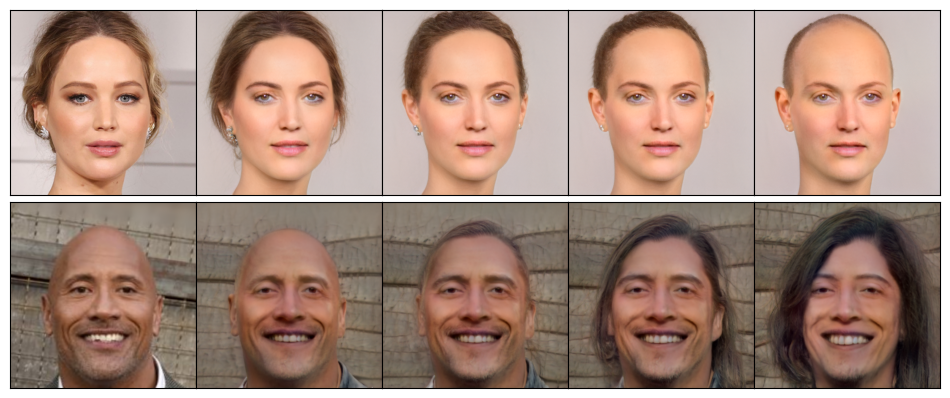

In [389]:

visualize_img_and_label(jen, rock)

# Malformations

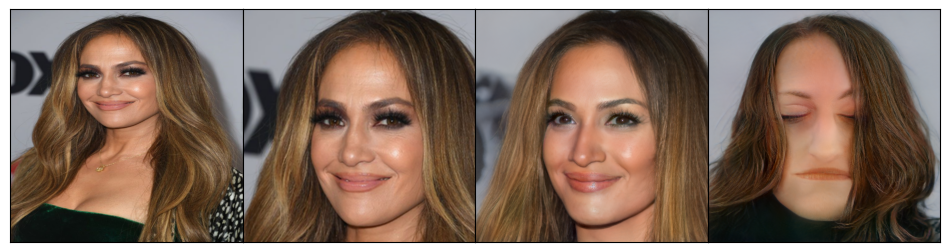

In [426]:
plt.figure(figsize=(12, 5))

im = PIL.Image.open('not_bald_9.png')
plt.subplot(1, 4, 1)
plt.imshow(im)
plt.xticks([])
plt.yticks([])



im = PIL.Image.open('target.png')
plt.subplot(1, 4, 2)
plt.imshow(im)
plt.xticks([])
plt.yticks([])


im = PIL.Image.open('proj.png')
plt.subplot(1, 4, 3)
plt.imshow(im)
plt.xticks([])
plt.yticks([])


im = PIL.Image.open('proj_.png')
plt.subplot(1, 4, 4)
plt.imshow(im)
plt.xticks([])
plt.yticks([])


plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig('deformations.png')
plt.show()